In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('./result_2.csv')

In [4]:
# df["Matches"] = df["Matches"].replace({True: "Yes", False: "No"})

In [5]:
df

,Old File Path,New File Path,Commit SHA,Parent Commit SHA,Commit Message,Diff Myers,Diff Histogram,Matches
0,tools/sort/sort.py,tools/sort/sort.py,544a95bc4fc2d87e5a83b938ff5ccd328f02d4e4,86ac59678486f4584b02dd561db826b903346e19,linting,"@@ -257,12 +257,12 @@ class Sort():\n ...","@@ -257,12 +257,12 @@ class Sort():\n ...",Yes
1,lib/gui/control_helper.py,lib/gui/control_helper.py,46cb53e6f0266885239663258c57966cfe475c61,544a95bc4fc2d87e5a83b938ff5ccd328f02d4e4,Training updates:\n - Expose optimizer epsilo...,"@@ -57,14 +57,18 @@ def set_slider_rounding(va...","@@ -57,14 +57,18 @@ def set_slider_rounding(va...",Yes
2,plugins/train/_config.py,plugins/train/_config.py,46cb53e6f0266885239663258c57966cfe475c61,544a95bc4fc2d87e5a83b938ff5ccd328f02d4e4,Training updates:\n - Expose optimizer epsilo...,"@@ -108,7 +108,7 @@ class Config(FaceswapConfi...","@@ -108,7 +108,7 @@ class Config(FaceswapConfi...",Yes
3,plugins/train/model/_base.py,plugins/train/model/_base.py,46cb53e6f0266885239663258c57966cfe475c61,544a95bc4fc2d87e5a83b938ff5ccd328f02d4e4,Training updates:\n - Expose optimizer epsilo...,"@@ -386,7 +386,8 @@ class ModelBase():\n ...","@@ -386,7 +386,8 @@ class ModelBase():\n ...",Yes
4,plugins/train/model/original_defaults.py,plugins/train/model/original_defaults.py,46cb53e6f0266885239663258c57966cfe475c61,544a95bc4fc2d87e5a83b938ff5ccd328f02d4e4,Training updates:\n - Expose optimizer epsilo...,"@@ -33,6 +33,9 @@\n rounding: [partia...","@@ -33,6 +33,9 @@\n rounding: [partia...",Yes
...,...,...,...,...,...,...,...,...
2319,tools/manual/manual.py,tools/manual/manual.py,b6ac7b8039a1474dfe1607601426289939b9b346,ea63f1e64a206157b61eaff1329324f03b3a4bd3,bugfix: Manual tool. Allow working with image ...,"@@ -1,6 +1,5 @@\n #!/usr/bin/env python3\n-""""""...","@@ -1,6 +1,5 @@\n #!/usr/bin/env python3\n-""""""...",Yes
2320,lib/align/alignments.py,lib/align/alignments.py,3f53ee9cec6d77565fc5bc2b3c6edd885334615d,b6ac7b8039a1474dfe1607601426289939b9b346,Bugfix: Convert - Correctly error if a valid m...,"@@ -407,8 +407,8 @@ class Alignments():\n ...","@@ -407,8 +407,8 @@ class Alignments():\n ...",Yes
2321,requirements/_requirements_base.txt,requirements/_requirements_base.txt,6fe300e601258babcbd5f3099178bbb52ae0c63a,3f53ee9cec6d77565fc5bc2b3c6edd885334615d,pin numpy to < 2.0,"@@ -1,7 +1,7 @@\n tqdm>=4.65\n psutil>=5.9.0\n...","@@ -1,7 +1,7 @@\n tqdm>=4.65\n psutil>=5.9.0\n...",Yes
2322,.install/linux/faceswap_setup_x64.sh,.install/linux/faceswap_setup_x64.sh,cbaad146d5aca9bd714bb6c69b10dd7c02d88f9d,6fe300e601258babcbd5f3099178bbb52ae0c63a,Bugfix: Linux installer - pin git to < 2.45,"@@ -380,7 +380,9 @@ activate_env() {\n install...","@@ -380,7 +380,9 @@ activate_env() {\n install...",Yes


In [6]:
non_match = (df["Matches"] == "No").sum()
print(non_match)

112


In [7]:
row_len = len(df)
print(row_len)


2324


In [8]:
2324 - 112 

2212

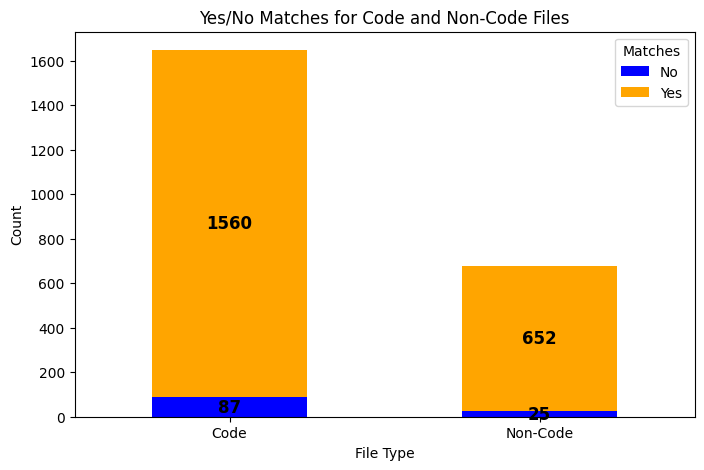

In [ ]:
import matplotlib.pyplot as plt
import os

df["New File Path"] = df["New File Path"].astype(str)
df["Extension"] = df["New File Path"].apply(lambda x: os.path.splitext(x)[1].lower() if "." in x else "")

unique_extensions = df["Extension"].unique()

code_file_exts = {".py", ".cpp", ".c", ".java", ".js", ".ts", ".cs", ".rb", ".go", ".php", ".swift", 
                  ".html", ".css", ".sh", ".pl", ".r", ".dart", ".lua", ".kt", ".m", ".h"}

df["File Type"] = df["Extension"].apply(lambda ext: "Code" if ext in code_file_exts else "Non-Code")

counts = df.groupby(["File Type", "Matches"]).size().unstack(fill_value=0)

counts = df.groupby(["File Type", "Matches"]).size().unstack(fill_value=0)

ax = counts.plot(kind="bar", stacked=True, color=["blue", "orange"], figsize=(8, 5))

for i, bars in enumerate(ax.containers):
    for bar in bars:
        height = bar.get_height()
        if height > 0:
            ax.text(
                bar.get_x() + bar.get_width() / 2, 
                bar.get_y() + height / 2, 
                f"{int(height)}",
                ha="center", va="center", fontsize=12, color="black", fontweight="bold"
            )

plt.xlabel("File Type")
plt.ylabel("Count")
plt.title("Yes/No Matches for Code and Non-Code Files")
plt.xticks(rotation=0)
plt.legend(title="Matches", labels=["No", "Yes"])
plt.show()